# Decision Tree

Aiswarya E V _________________________________________________________________________________________19.10.2022

In [1]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import tree


In [2]:
df= pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
y=df['species']
print(y)
df=df.drop(['species'],axis=1)
x= df
print(x)
print(x)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal

In [10]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =0)

In [11]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [12]:
classifier= tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.4, 0.9, 'X[3] <= -0.542\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 0.644\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'X[3] <= 0.549\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'X[1] <= 0.111\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[3] <= 0.677\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'X[3] <= 0.549\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

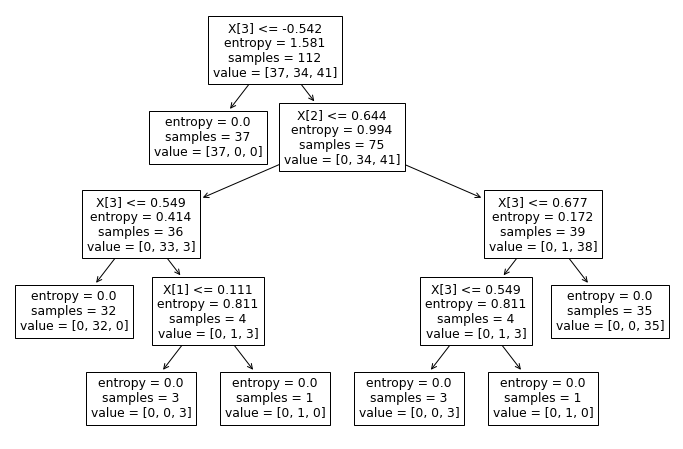

In [13]:
##Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(classifier)

Defaulting to user installation because normal site-packages is not writeable


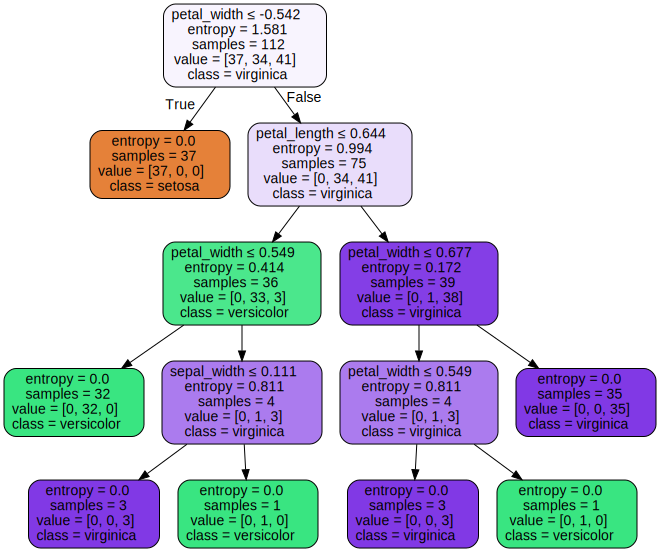

In [15]:
##Visualize decision-trees with graphviz
##execute the command 'sudo apt-get install graphviz' in the terminal
!pip install graphviz
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,
feature_names=df.columns,
class_names=['setosa','versicolor','virginica'],
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [16]:
y_pred= classifier.predict(x_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [17]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


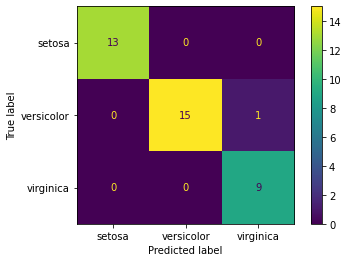

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

In [19]:
from sklearn.metrics import accuracy_score
print('Test accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Test accuracy score with criterion entropy: 0.9737


In [20]:
y_pred_train= classifier.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000
